In [1]:
%pip install catboost xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
from preprocessing_withval import Makeloader, create_loaders
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
import numpy as np
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


## Dataloader 생성

In [3]:

train_dirs = ['/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T1/',
              '/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T4/']
test_dirs = ['/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T5/',
             '/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T8/']# Directories containing your data

# Mode: Choose 'Acc', 'Force', or 'Mix'
mode = "Mix"

# Batch size
batch_size = 32

# Train:Validation split ratio (e.g., 0.9 for 90% train, 10% validation)
train_val_ratio = 0.9


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:

train_loader, val_loader = create_loaders(
    directories=train_dirs,
    mode=mode,
    batch_size=batch_size,
    train_val_ratio=train_val_ratio
)


test_loader = create_loaders(
    directories=test_dirs,  # Directories for test data
    mode=mode,
    batch_size=batch_size,
    train_val_ratio=None  # No train/val split for test data
)



# Model 정의

In [6]:
from model import LSTMRegressor, SVRRegressor, RFRRegressor, GRURegressor
from train import train_model
from test import evaluate_model, evaluate_model_ML, evaluate_model_ML_s
import numpy as np

In [7]:

# Hyperparameters for LSTM, GRU
input_size = next(iter(train_loader))[0].shape[1]  # Number of features
hidden_size = 128
num_layers = 2
output_size = 1
learning_rate = 0.001
batch_size = 32
epochs = 500




### GRU Regressor

Epoch 1/200, Train Loss: 41617.8132, Val Loss: 32861.6260
Epoch 2/200, Train Loss: 28692.5724, Val Loss: 23186.6609
Epoch 3/200, Train Loss: 20349.8829, Val Loss: 16358.7618
Epoch 4/200, Train Loss: 14398.5457, Val Loss: 11531.4516
Epoch 5/200, Train Loss: 10241.2717, Val Loss: 8258.5088
Epoch 6/200, Train Loss: 7448.0375, Val Loss: 6137.0815
Epoch 7/200, Train Loss: 5575.7470, Val Loss: 4364.7039
Epoch 8/200, Train Loss: 3789.7598, Val Loss: 2904.3541
Epoch 9/200, Train Loss: 2568.5434, Val Loss: 1975.7020
Epoch 10/200, Train Loss: 1760.4983, Val Loss: 1378.1515
Epoch 11/200, Train Loss: 1240.7474, Val Loss: 1006.1813
Epoch 12/200, Train Loss: 911.3689, Val Loss: 788.9798
Epoch 13/200, Train Loss: 680.4347, Val Loss: 594.9260
Epoch 14/200, Train Loss: 522.7514, Val Loss: 445.2793
Epoch 15/200, Train Loss: 392.3676, Val Loss: 360.6469
Epoch 16/200, Train Loss: 296.6905, Val Loss: 260.6423
Epoch 17/200, Train Loss: 212.7475, Val Loss: 227.3882
Epoch 18/200, Train Loss: 158.4790, Val Los

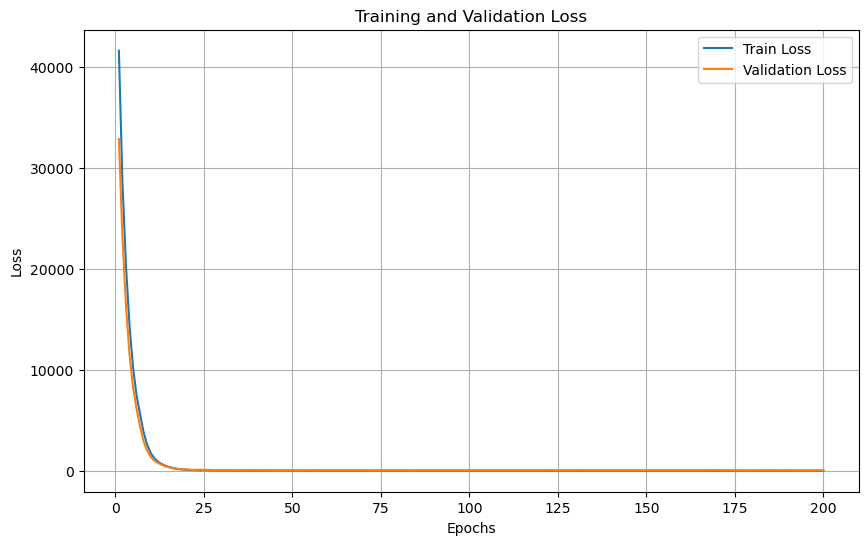

Train ended.


In [8]:
# Model, criterion, optimizer
model = GRURegressor(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=200)

print("Train ended.")




Evaluation Metrics:
RMSE: 19.5624
MAE: 17.2056
R² Score: 0.8794
MAPE: 9.66%
Explained Variance Score: 0.9148


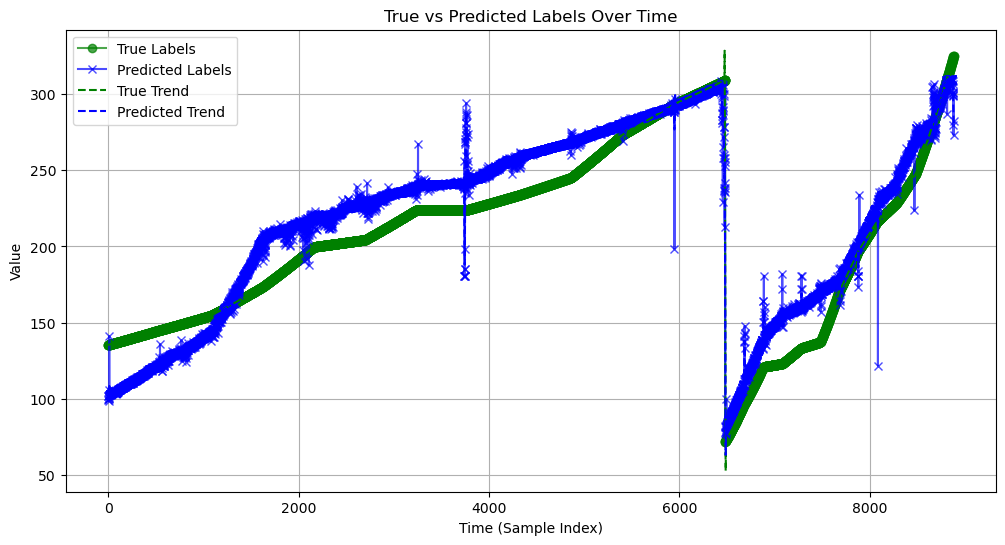

Test Metrics:
RMSE: 19.5624
MAE: 17.2056
R² Score: 0.8794
MAPE: 9.66%
Explained Variance Score: 0.9148


In [9]:
# Evaluate the model and visualize
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

### LSTMRegressor

Epoch 1/200, Train Loss: 43433.2659, Val Loss: 35898.1046
Epoch 2/200, Train Loss: 32613.3825, Val Loss: 27653.7156
Epoch 3/200, Train Loss: 25229.8068, Val Loss: 21309.9581
Epoch 4/200, Train Loss: 19475.0979, Val Loss: 16353.9143
Epoch 5/200, Train Loss: 14975.7287, Val Loss: 12530.1232
Epoch 6/200, Train Loss: 11515.0565, Val Loss: 9631.2205
Epoch 7/200, Train Loss: 8911.7041, Val Loss: 7505.1447
Epoch 8/200, Train Loss: 7010.3148, Val Loss: 5994.2761
Epoch 9/200, Train Loss: 5651.7589, Val Loss: 4821.6535
Epoch 10/200, Train Loss: 4197.7901, Val Loss: 3304.1458
Epoch 11/200, Train Loss: 3008.3535, Val Loss: 2403.7127
Epoch 12/200, Train Loss: 2186.2612, Val Loss: 1738.7426
Epoch 13/200, Train Loss: 1593.6506, Val Loss: 1286.8770
Epoch 14/200, Train Loss: 1184.2799, Val Loss: 995.3841
Epoch 15/200, Train Loss: 910.0313, Val Loss: 767.0272
Epoch 16/200, Train Loss: 708.9231, Val Loss: 623.1289
Epoch 17/200, Train Loss: 565.5846, Val Loss: 520.0892
Epoch 18/200, Train Loss: 467.3222, 

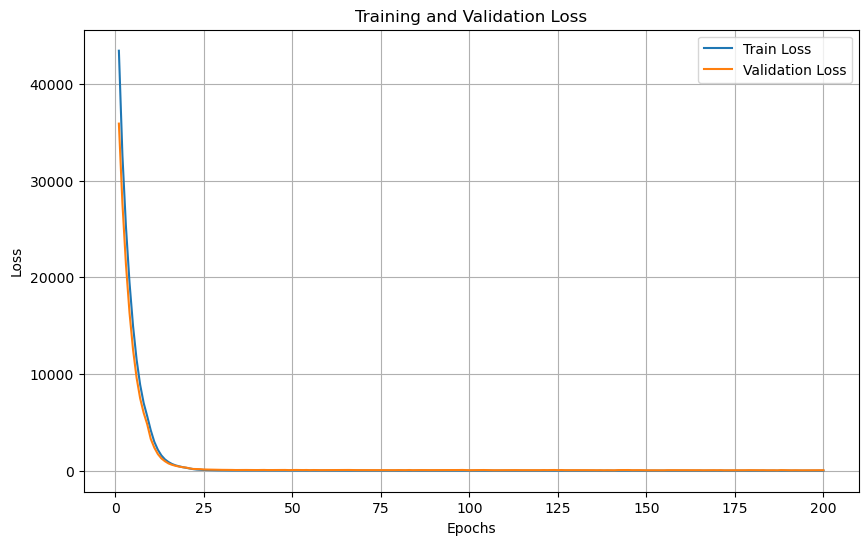

Train ended.


In [10]:

model = LSTMRegressor(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=200)

print("Train ended.")

Evaluation Metrics:
RMSE: 19.6505
MAE: 17.2016
R² Score: 0.8783
MAPE: 9.69%
Explained Variance Score: 0.9148


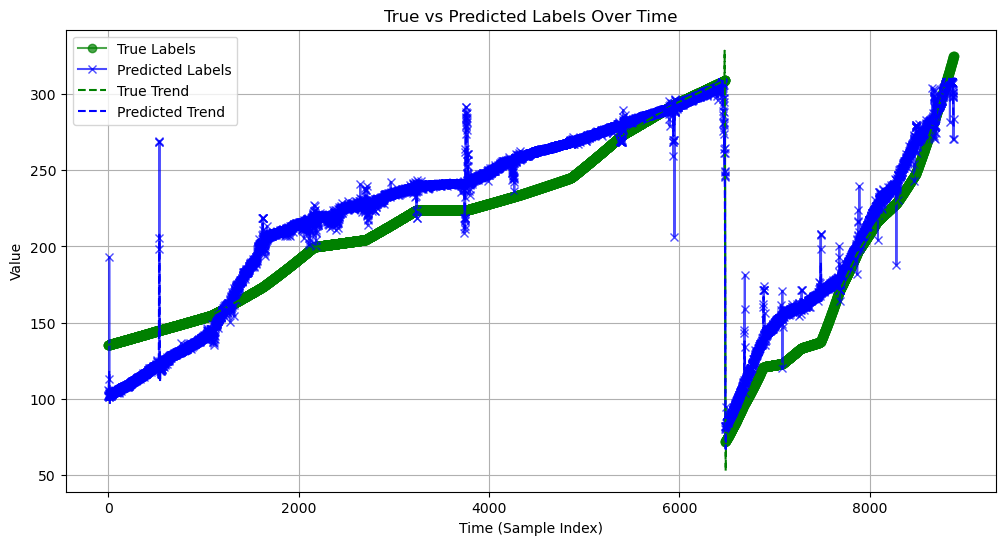

Test Metrics:
RMSE: 19.6505
MAE: 17.2016
R² Score: 0.8783
MAPE: 9.69%
Explained Variance Score: 0.9148


In [11]:
# Evaluate the model and visualize
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device)

# 출력된 평가 지표 확인
print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

### Numpy 입력 모델들용 전처리

In [12]:
from utils import prepare_data
from sklearn.preprocessing import StandardScaler
from test import evaluate_model_ML, evaluate_model_ML_s
X_train, y_train = prepare_data(train_loader)
X_val, y_val = prepare_data(val_loader)
X_test, y_test = prepare_data(test_loader)

# 데이터 스케일링 (Train 데이터로만 fit)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



### SVR

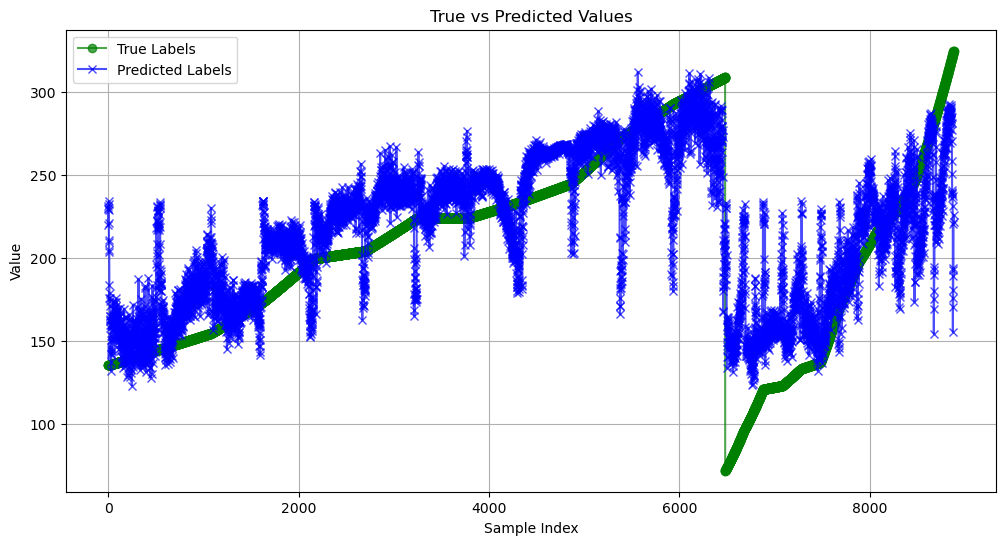

Test Metrics:
RMSE: 31.2053
MAE: 24.1585
R² Score: 0.6930
MAPE: 14.09%
Explained Variance Score: 0.7344


In [13]:
svr = SVRRegressor(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(torch.tensor(X_train_scaled).unsqueeze(1), torch.tensor(y_train))

metrics, all_preds, all_labels = evaluate_model_ML(svr, X_test_scaled, y_test)
print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

### RFR

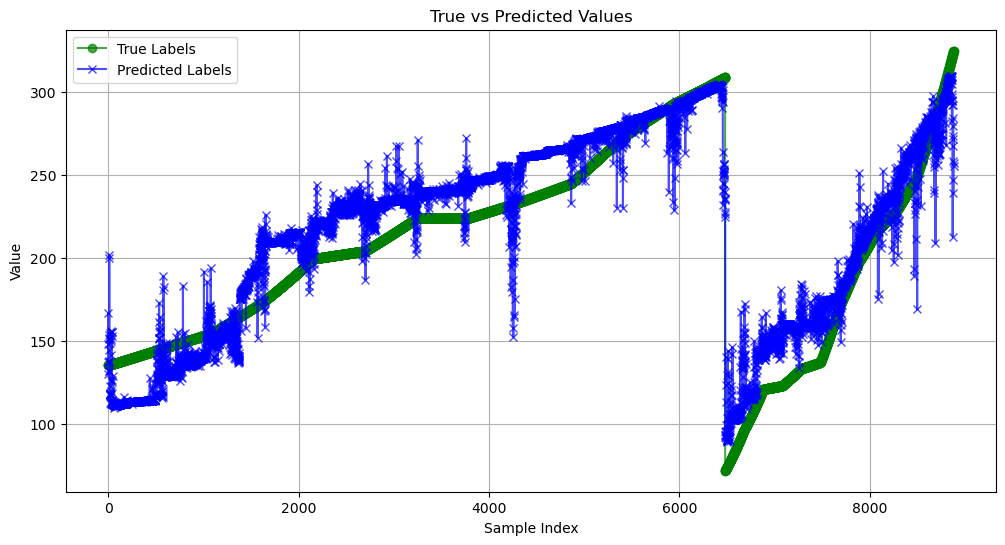

Test Metrics:
RMSE: 20.2696
MAE: 17.5045
R² Score: 0.8705
MAPE: 9.93%
Explained Variance Score: 0.9030


In [14]:
RFR = RFRRegressor(n_estimators=100, max_depth=10, random_state=42)
RFR.fit(torch.tensor(X_train_scaled).unsqueeze(1), torch.tensor(y_train))

metrics, all_preds, all_labels = evaluate_model_ML(RFR, X_test_scaled, y_test)
print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

### Catboost

0:	learn: 58.6572773	test: 57.0148768	best: 57.0148768 (0)	total: 16.6ms	remaining: 33.1s
1:	learn: 58.2092976	test: 56.5904064	best: 56.5904064 (1)	total: 30.5ms	remaining: 30.5s
2:	learn: 57.7748274	test: 56.1801899	best: 56.1801899 (2)	total: 44.2ms	remaining: 29.4s
3:	learn: 57.3374623	test: 55.7538469	best: 55.7538469 (3)	total: 57.9ms	remaining: 28.9s
4:	learn: 56.8979756	test: 55.3374639	best: 55.3374639 (4)	total: 72ms	remaining: 28.7s
5:	learn: 56.4618893	test: 54.9253753	best: 54.9253753 (5)	total: 86ms	remaining: 28.6s
6:	learn: 56.0345485	test: 54.5196840	best: 54.5196840 (6)	total: 99.7ms	remaining: 28.4s
7:	learn: 55.6309856	test: 54.1284966	best: 54.1284966 (7)	total: 113ms	remaining: 28.2s
8:	learn: 55.2118497	test: 53.7312444	best: 53.7312444 (8)	total: 127ms	remaining: 28s
9:	learn: 54.7994021	test: 53.3451071	best: 53.3451071 (9)	total: 140ms	remaining: 27.9s
10:	learn: 54.4105022	test: 52.9813370	best: 52.9813370 (10)	total: 154ms	remaining: 27.8s
11:	learn: 54.0044

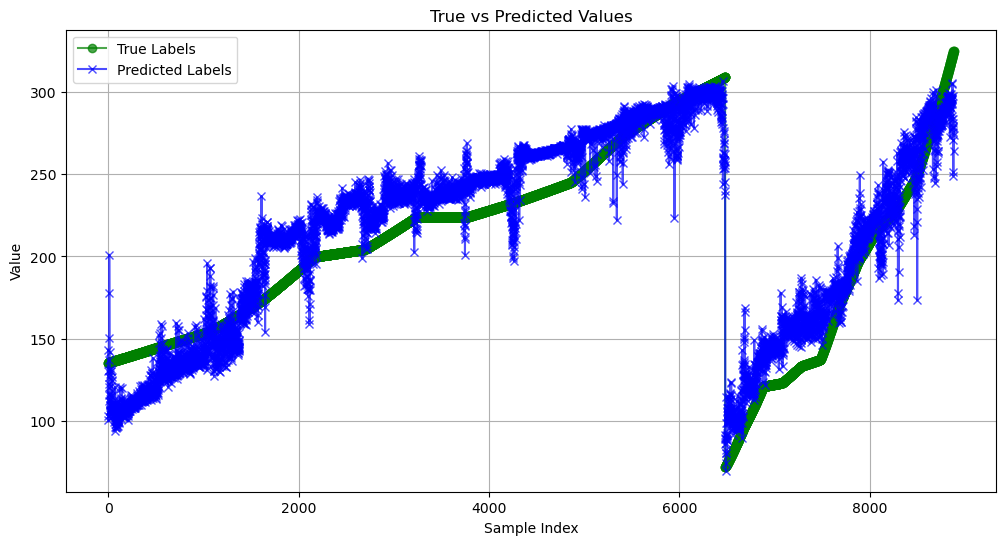

Test Metrics:
RMSE: 20.4274
MAE: 17.9355
R² Score: 0.8685
MAPE: 10.01%
Explained Variance Score: 0.8955


In [15]:
catboost_model = CatBoostRegressor(
    iterations=2000,         # 학습 반복 횟수
    learning_rate=0.01,     # 학습률
    depth=8,                # 트리 깊이
    loss_function='RMSE',   # 손실 함수
    task_type="GPU" if torch.cuda.is_available() else "CPU",  # GPU 사용 여부
    verbose=100             # 학습 로그 출력
)


catboost_model.fit(
    X_train_scaled, 
    y_train, 
    eval_set=(X_test_scaled, y_test), 
    verbose=True
)
metrics, all_preds, all_labels = evaluate_model_ML_s(catboost_model, X_test_scaled, y_test)
print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

### XGBRegressor

[0]	validation_0-rmse:56.92369


/home/crois-times/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:34:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "task_type" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:27.18806
[200]	validation_0-rmse:20.78033
[300]	validation_0-rmse:20.05017
[400]	validation_0-rmse:20.03315
[500]	validation_0-rmse:20.06805
[600]	validation_0-rmse:20.09010
[700]	validation_0-rmse:20.08982
[800]	validation_0-rmse:20.09157
[900]	validation_0-rmse:20.08874
[1000]	validation_0-rmse:20.08403
[1100]	validation_0-rmse:20.08008
[1200]	validation_0-rmse:20.07697
[1300]	validation_0-rmse:20.07206
[1400]	validation_0-rmse:20.06716
[1500]	validation_0-rmse:20.06539
[1600]	validation_0-rmse:20.06146
[1700]	validation_0-rmse:20.05842
[1800]	validation_0-rmse:20.05539
[1900]	validation_0-rmse:20.05330
[1999]	validation_0-rmse:20.05199


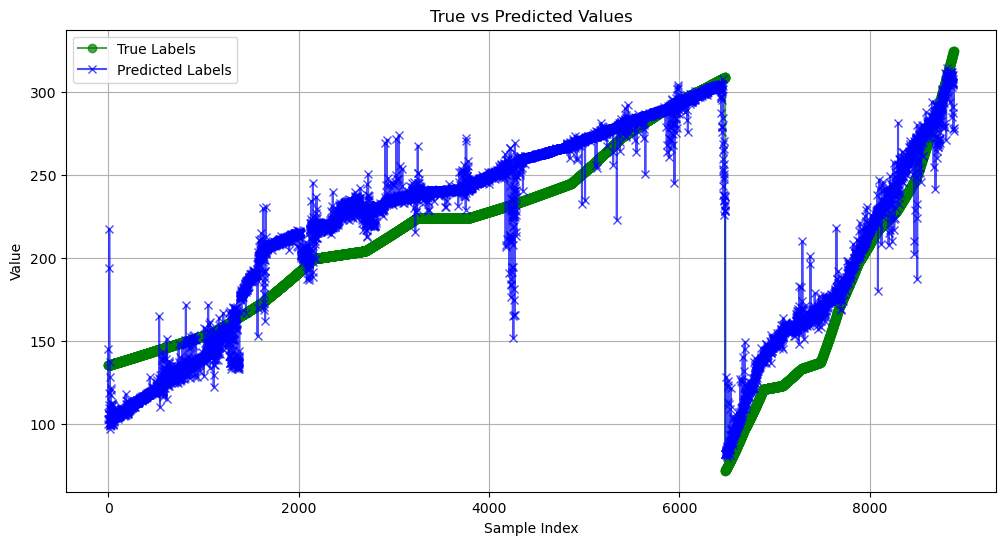

Test Metrics:
RMSE: 20.0520
MAE: 17.5262
R² Score: 0.8733
MAPE: 9.85%
Explained Variance Score: 0.9055


In [16]:

# XGBoost 모델 설정
xgb_model = XGBRegressor(
    n_estimators=2000,      # 학습 반복 횟수 (trees)
    learning_rate=0.01,     # 학습률
    max_depth=8,            # 트리 깊이
    objective='reg:squarederror',  # 손실 함수 (회귀 문제)
    eval_metric="rmse",     # RMSE 평가 지표 설정
    task_type="GPU" if torch.cuda.is_available() else "CPU",  # GPU/CPU 자동 선택
    verbosity=1             # 학습 로그 출력
)

# 학습
xgb_model.fit(
    X_train_scaled, 
    y_train, 
    eval_set=[(X_test_scaled, y_test)], 
    verbose=100
)
metrics, all_preds, all_labels = evaluate_model_ML_s(xgb_model, X_test_scaled, y_test)
print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")